In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [160]:
# read in file
df = pd.read_json('newsqa.json')

#### Creating a dataframe of the annotations

In [161]:
# initial file contains 3 columns - annotations, id and original_id
df.head()

,annotations,id,original_id
0,"[{'skills': [11], 'sents_indices': [[107, 126]...",newsqa_000,./cnn/stories/eace03b0b83764932f0dbb3898e3312c...
1,"[{'skills': [8], 'sents_indices': [[218, 225]]...",newsqa_001,./cnn/stories/cf46015354e443e19c06c587be3c49c3...
2,"[{'skills': [8, 2, 11, 12], 'sents_indices': [...",newsqa_002,./cnn/stories/85120db668eed10b40a7435772eddbef...
3,"[{'skills': [8], 'sents_indices': [[104, 123],...",newsqa_003,./cnn/stories/ccaf053c87d21a67aec33c5f89e37c4a...
4,"[{'skills': [1, 3], 'sents_indices': [[2, 18]]...",newsqa_004,./cnn/stories/9a3d4d7dfb59317d30729fb56592c2e0...


There is a strange point about this dataframe because the original data set has multiple questions per original_id, but it doesn't specify which question this references.

In [224]:
len(df)

100

There are 100 entries from the NewsQA dataset in the annotated values.

In [162]:
# to keep track of everything easier make the id the index
df.set_index('id', inplace = True)

In [163]:
# extract names of the items in annotations
col_names = list(df['annotations'].iloc[0][0].keys())

In [164]:
# the annotations is a dictionary in a list, so extract the values from the dictionary
for i in range(0, len(df)):
    df['annotations'].iloc[i] = list(df['annotations'].iloc[i][0].values())

In [165]:
# make a new dataframe with the annotations separated out
annots = df['annotations'].apply(pd.Series)

In [166]:
# rename the columns of the new annots dataframe to have the correct labels from the keys
annots.columns = col_names

In [167]:
# extract out the individual skills
skills = annots['skills'].apply(pd.Series)
skills = skills.rename(columns = lambda x : 'skill_' + str(x))

In [168]:
skills.head()

,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5
id,,,,,,
newsqa_000,11.0,NaN,NaN,NaN,NaN,NaN
newsqa_001,8.0,NaN,NaN,NaN,NaN,NaN
newsqa_002,8.0,2.0,11.0,12.0,NaN,NaN
newsqa_003,8.0,NaN,NaN,NaN,NaN,NaN
newsqa_004,1.0,3.0,NaN,NaN,NaN,NaN


In [169]:
# put all of the columns back into one dataframe
df = pd.concat([df[:], annots[:], skills[:]], axis=1)

In [170]:
df.head()

,annotations,original_id,skills,sents_indices,skill_count,nonsense,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5
id,,,,,,,,,,,,
newsqa_000,"[[11], [[107, 126]], 1, False]",./cnn/stories/eace03b0b83764932f0dbb3898e3312c...,[11],"[[107, 126]]",1,False,11.0,NaN,NaN,NaN,NaN,NaN
newsqa_001,"[[8], [[218, 225]], 1, False]",./cnn/stories/cf46015354e443e19c06c587be3c49c3...,[8],"[[218, 225]]",1,False,8.0,NaN,NaN,NaN,NaN,NaN
newsqa_002,"[[8, 2, 11, 12], [[479, 518]], 4, False]",./cnn/stories/85120db668eed10b40a7435772eddbef...,"[8, 2, 11, 12]","[[479, 518]]",4,False,8.0,2.0,11.0,12.0,NaN,NaN
newsqa_003,"[[8], [[104, 123], [0, 31]], 1, False]",./cnn/stories/ccaf053c87d21a67aec33c5f89e37c4a...,[8],"[[104, 123], [0, 31]]",1,False,8.0,NaN,NaN,NaN,NaN,NaN
newsqa_004,"[[1, 3], [[2, 18]], 2, False]",./cnn/stories/9a3d4d7dfb59317d30729fb56592c2e0...,"[1, 3]","[[2, 18]]",2,False,1.0,3.0,NaN,NaN,NaN,NaN


#### EDA

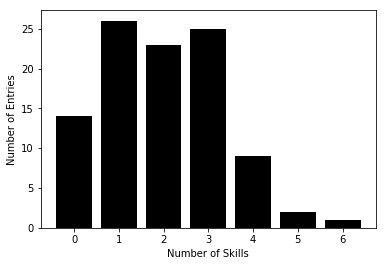

In [188]:
# Skill Count
plt.hist(df.skill_count, bins = [-.5, .5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], rwidth = 0.8, color = "black")
plt.xlabel("Number of Skills")
plt.ylabel("Number of Entries")
plt.show()

In [251]:
def val_counts(d):
    val_counts = (pd.concat([d.skill_0[:], d.skill_1[:], d.skill_2[:], d.skill_3[:], d.skill_4[:], d.skill_5[:]], axis=1)).apply(pd.Series.value_counts)
    val_counts.fillna(0, inplace = True)
    val_counts['total'] = val_counts.skill_0 + val_counts.skill_1 + val_counts.skill_2 + val_counts.skill_3 + val_counts.skill_4 + val_counts.skill_5
    return val_counts

In [253]:
skill_counts = val_counts(df)
skill_counts

,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5,total
0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2.0,7.0,11.0,6.0,0.0,0.0,0.0,24.0
3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
4.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
5.0,1.0,0.0,2.0,0.0,1.0,0.0,4.0
6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0
7.0,3.0,3.0,6.0,3.0,0.0,0.0,15.0
8.0,47.0,2.0,1.0,0.0,0.0,0.0,50.0
9.0,15.0,19.0,0.0,2.0,0.0,0.0,36.0


One entry has skill 14 listed, that seems to be an error - there is no skill 14 in the paper?

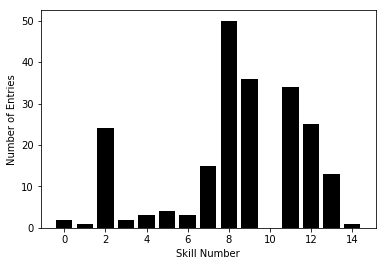

In [254]:
plt.bar(skill_counts.index, skill_counts.total, color = "black")
plt.xlabel("Skill Number")
plt.ylabel("Number of Entries")
plt.show()

In [210]:
# Nonsense
df.nonsense.value_counts()

False    99
True      1
Name: nonsense, dtype: int64

In [211]:
df[df.nonsense == True]
# why does this show a skill count of 0, but it lists one skill?

,annotations,original_id,skills,sents_indices,skill_count,nonsense,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5
id,,,,,,,,,,,,
newsqa_009,"[[14], [[56, 94]], 0, True]",./cnn/stories/2577ef64a22c06cf63cb244abfad9ecc...,[14],"[[56, 94]]",0,True,14.0,NaN,NaN,NaN,NaN,NaN


In [219]:
len(df['skills'][df.nonsense == True])

1

In [220]:
df['skill count off'] = pd.Series([])

In [221]:
for i in range(0, len(df)):
    if len(df.skills.iloc[i]) == df.skill_count.iloc[i]:
        df['skill count off'].iloc[i] = 0
    else:
        df['skill count off'].iloc[i] = 1

C:\Users\kplat\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [223]:
df[df['skill count off'] == 1]

,annotations,original_id,skills,sents_indices,skill_count,nonsense,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5,skill count off
id,,,,,,,,,,,,,
newsqa_007,"[[13], [[123, 143], [47, 73]], 0, False]",./cnn/stories/45986f43dd61461844801c08c8753a71...,[13],"[[123, 143], [47, 73]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0
newsqa_009,"[[14], [[56, 94]], 0, True]",./cnn/stories/2577ef64a22c06cf63cb244abfad9ecc...,[14],"[[56, 94]]",0,True,14.0,NaN,NaN,NaN,NaN,NaN,1.0
newsqa_020,"[[13], [[2, 27]], 0, False]",./cnn/stories/c7ed7ca41335c11b53e3919b64306031...,[13],"[[2, 27]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0
newsqa_040,"[[13], [[48, 55]], 0, False]",./cnn/stories/5c39e30ec1cc570775431643a70010dc...,[13],"[[48, 55]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0
newsqa_050,"[[13], [[477, 492]], 0, False]",./cnn/stories/ceb258244a421dab018c110a5745d182...,[13],"[[477, 492]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0
newsqa_053,"[[13], [[65, 77]], 0, False]",./cnn/stories/a83c98a89a5ef51934f67b6965870d5e...,[13],"[[65, 77]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0
newsqa_054,"[[13], [[90, 98]], 0, False]",./cnn/stories/cc420f3c4c9b3d1385f1e8a3d4049a67...,[13],"[[90, 98]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0
newsqa_058,"[[13], [[44, 54]], 0, False]",./cnn/stories/bc8c4aaf7e727c7c5ac1370123ef2c82...,[13],"[[44, 54]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0
newsqa_063,"[[13], [[80, 104]], 0, False]",./cnn/stories/edf3704a0b59c4fd33afc8ba7c79d63e...,[13],"[[80, 104]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0


It appears that when the skill listed is number 13, then the number of skills counted is 0. This refers to the paper that provides the notation that skill 13 is no skills. Additionally, the question labeled as 'nonsense' is also listed as having 0 skills needed.

In [233]:
# Sentence Indices

df['num_sents'] = pd.Series([])
for i in range(0, len(df)):
    df.num_sents.iloc[i] = len(df.sents_indices.iloc[i])

C:\Users\kplat\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


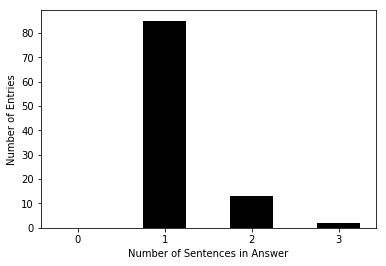

In [242]:
plt.hist(df.num_sents, bins = [0, 1, 2, 3, 4], rwidth = 0.5, color = 'black', align = "left")
plt.xlabel("Number of Sentences in Answer")
plt.ylabel("Number of Entries")
plt.xticks([0, 1, 2, 3])
plt.show()

In [243]:
df[df.num_sents == 3]

,annotations,original_id,skills,sents_indices,skill_count,nonsense,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5,skill count off,num_sents
id,,,,,,,,,,,,,,
newsqa_018,"[[8, 2, 7], [[877, 881], [858, 877], [881, 897...",./cnn/stories/288a5010b271e229256dcb7c86c5a1ee...,"[8, 2, 7]","[[877, 881], [858, 877], [881, 897]]",3,False,8.0,2.0,7.0,NaN,NaN,NaN,0.0,3.0
newsqa_036,"[[8, 9, 7], [[0, 45], [45, 57], [57, 94]], 3, ...",./cnn/stories/38c738039ede29cadb34607eebbeaf4e...,"[8, 9, 7]","[[0, 45], [45, 57], [57, 94]]",3,False,8.0,9.0,7.0,NaN,NaN,NaN,0.0,3.0


(0, 14)

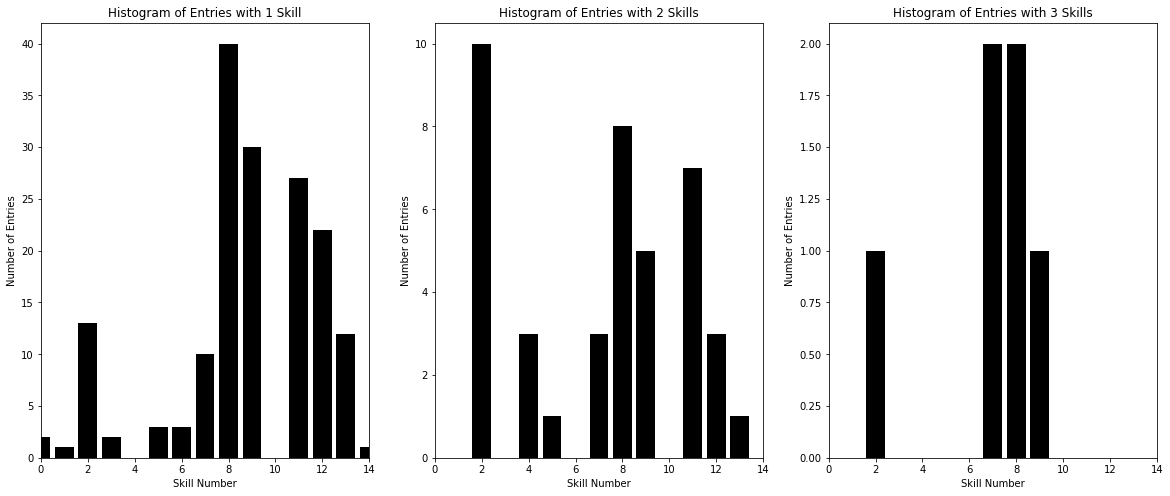

In [262]:
plt.figure(figsize = (20, 8))

skill3 = val_counts(df[df.num_sents == 3])
plt.subplot(133)
plt.bar(skill3.index, skill3['total'], color = "black")
plt.xlabel("Skill Number")
plt.ylabel("Number of Entries")
plt.title("Histogram of Entries with 3 Skills")
plt.xlim((0, 14))

skill2 = val_counts(df[df.num_sents == 2])
plt.subplot(132)
plt.bar(skill2.index, skill2['total'], color = "black")
plt.xlabel("Skill Number")
plt.ylabel("Number of Entries")
plt.title("Histogram of Entries with 2 Skills")
plt.xlim((0, 14))

skill1 = val_counts(df[df.num_sents == 1])
plt.subplot(131)
plt.bar(skill1.index, skill1['total'], color = "black")
plt.xlabel("Skill Number")
plt.ylabel("Number of Entries")
plt.title("Histogram of Entries with 1 Skill")
plt.xlim((0, 14))

In [244]:
df[df.num_sents == 2]

,annotations,original_id,skills,sents_indices,skill_count,nonsense,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5,skill count off,num_sents
id,,,,,,,,,,,,,,
newsqa_003,"[[8], [[104, 123], [0, 31]], 1, False]",./cnn/stories/ccaf053c87d21a67aec33c5f89e37c4a...,[8],"[[104, 123], [0, 31]]",1,False,8.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0
newsqa_007,"[[13], [[123, 143], [47, 73]], 0, False]",./cnn/stories/45986f43dd61461844801c08c8753a71...,[13],"[[123, 143], [47, 73]]",0,False,13.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0
newsqa_010,"[[8, 9, 2], [[2, 29], [29, 69]], 3, False]",./cnn/stories/fe1534a6e3c76d94e1a9df9f1d3efe92...,"[8, 9, 2]","[[2, 29], [29, 69]]",3,False,8.0,9.0,2.0,NaN,NaN,NaN,0.0,2.0
newsqa_016,"[[7], [[26, 44], [44, 48]], 1, False]",./cnn/stories/3f5ca95629547152142476f5cfa04557...,[7],"[[26, 44], [44, 48]]",1,False,7.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0
newsqa_023,"[[8, 2, 11, 7], [[47, 71], [33, 47]], 4, False]",./cnn/stories/f3fbb3773503ee514b74b57cfa592218...,"[8, 2, 11, 7]","[[47, 71], [33, 47]]",4,False,8.0,2.0,11.0,7.0,NaN,NaN,0.0,2.0
newsqa_033,"[[2, 11, 7], [[27, 51], [5, 16]], 3, False]",./cnn/stories/2a34d74c816a6db0fabe856af197aa6d...,"[2, 11, 7]","[[27, 51], [5, 16]]",3,False,2.0,11.0,7.0,NaN,NaN,NaN,0.0,2.0
newsqa_034,"[[2, 12], [[144, 155], [155, 180]], 2, False]",./cnn/stories/6dfd27a15c730f9618a6789105316cc4...,"[2, 12]","[[144, 155], [155, 180]]",2,False,2.0,12.0,NaN,NaN,NaN,NaN,0.0,2.0
newsqa_049,"[[8, 2, 11, 4], [[3, 11], [70, 104]], 4, False]",./cnn/stories/b1b5590277596d000f0fcfd1e66a2ab6...,"[8, 2, 11, 4]","[[3, 11], [70, 104]]",4,False,8.0,2.0,11.0,4.0,NaN,NaN,0.0,2.0
newsqa_060,"[[2, 4, 8, 9, 11, 12], [[217, 267], [36, 49]],...",./cnn/stories/244da30ec12f1e291866f62bb016c570...,"[2, 4, 8, 9, 11, 12]","[[217, 267], [36, 49]]",6,False,2.0,4.0,8.0,9.0,11.0,12.0,0.0,2.0


#### Future Steps
Can these be related back to the original dataset to see how these correlate with the validated answers and quality control questions?
